<a href="https://colab.research.google.com/github/DiogoKarmouche/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assigment 9- Portifólio: Clustering

## Informações do dataset

**CUSTID** : Identification of Credit Card holder (Categorical)

**BALANCE** : Balance amount left in their account to make purchases (

**BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES** : Amount of purchases made from account

**ONEOFFPURCHASES** : Maximum purchase amount done in one-go

**INSTALLMENTSPURCHASES** : Amount of purchase done in installment

**CASHADVANCE** : Cash in advance given by the user

**PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid

**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"

**PURCHASESTRX** : Numbe of purchase transactions made

**CREDITLIMIT** : Limit of Credit Card for user

**PAYMENTS** : Amount of Payment done by user

**MINIMUM_PAYMENTS** : Minimum amount of payments made by user

**PRCFULLPAYMENT** : Percent of full payment paid by user

**TENURE** : Tenure of credit card service for user

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carregando dataset e bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dex/CC GENERAL.csv')

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Limpeza dos dados

removendo dados não necessários, como a coluna **CUST_ID**

In [ ]:
df_new = df.copy() # criando um cópia do dataset original

In [ ]:
df_new.drop('CUST_ID',axis=1,inplace=True)

In [ ]:
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


verificando se há valores nulos

In [ ]:
df_new.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

em caso de valores nulos, foi sugerido substituir os valores nulos pelo mínimo valor da coluna

In [ ]:
display(min(df_new['MINIMUM_PAYMENTS']))
display(min(df_new['CREDIT_LIMIT']))

0.019163

50.0

In [ ]:
df_new['MINIMUM_PAYMENTS'].fillna(min(df_new['MINIMUM_PAYMENTS']),inplace=True)
df_new['CREDIT_LIMIT'].fillna(min(df_new['CREDIT_LIMIT']),inplace=True)

In [ ]:
df_new.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

remoção de outlier

In [ ]:
outlier = df_new.describe(percentiles=[0.15,0.3,0.45,0.60,0.75,0.95])
outlier

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.952864,1733.143852,833.984123,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.915681,2895.063757,2335.989679,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
15%,44.512466,0.636364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,250.997079,118.472690,0.000000,11.000000
30%,207.176552,0.909091,89.285000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,2000.000000,459.438287,174.121321,0.000000,12.000000
45%,665.632031,1.000000,282.396500,0.000000,31.926000,0.000000,0.333333,0.000000,0.083333,0.000000,0.000000,6.000000,3000.000000,725.330384,239.691068,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
60%,1207.815587,1.000000,557.546000,168.378000,213.950000,238.633724,0.666667,0.083333,0.416667,0.083333,1.000000,11.000000,4200.000000,1185.259270,438.826129,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000


In [ ]:
outlier=outlier[['BALANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']]

In [ ]:
outlier = outlier.loc['95%'].tolist()

In [ ]:
df = df_new[(df_new['BALANCE']<5909.111808)&
            (df_new['PURCHASES']<3998.619500)&
            (df_new['MINIMUM_PAYMENTS']<2719.566935)&
            (df_new['PAYMENTS']<6082.090595)&
            (df_new['CREDIT_LIMIT']<12000.000000)&
            (df_new['PURCHASES_TRX']<57.000000)&
            (df_new['ONEOFF_PURCHASES']<2671.094000)&
            (df_new['CASH_ADVANCE']<4647.169122)&
            (df_new['CASH_ADVANCE_TRX']<15.000000)]

In [ ]:
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df[['BALANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']])

## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6880 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           6880 non-null   float64
 1   BALANCE_FREQUENCY                 6880 non-null   float64
 2   PURCHASES                         6880 non-null   float64
 3   ONEOFF_PURCHASES                  6880 non-null   float64
 4   INSTALLMENTS_PURCHASES            6880 non-null   float64
 5   CASH_ADVANCE                      6880 non-null   float64
 6   PURCHASES_FREQUENCY               6880 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        6880 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  6880 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            6880 non-null   float64
 10  CASH_ADVANCE_TRX                  6880 non-null   int64  
 11  PURCHASES_TRX                     6880 non-null   int64  
 12  CREDIT

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,6880.0,995.151694,1190.965770,0.000000,75.973734,547.868765,1462.396758,5906.184924
BALANCE_FREQUENCY,6880.0,0.857780,0.252570,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,6880.0,579.426174,721.139243,0.000000,41.400000,308.190000,832.010000,3986.240000
ONEOFF_PURCHASES,6880.0,300.337948,517.630795,0.000000,0.000000,0.000000,395.012500,2655.990000
INSTALLMENTS_PURCHASES,6880.0,279.366419,452.429074,0.000000,0.000000,76.430000,387.702500,3927.120000
CASH_ADVANCE,6880.0,500.025960,902.031092,0.000000,0.000000,0.000000,650.349033,4639.195255
PURCHASES_FREQUENCY,6880.0,0.469246,0.391970,0.000000,0.083333,0.416667,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,6880.0,0.162995,0.261136,0.000000,0.000000,0.000000,0.250000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,6880.0,0.346478,0.386524,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,6880.0,0.100031,0.152807,0.000000,0.000000,0.000000,0.166667,1.166667


In [ ]:
df.skew()

BALANCE                             1.657985
BALANCE_FREQUENCY                  -1.784670
PURCHASES                           1.733119
ONEOFF_PURCHASES                    2.150898
INSTALLMENTS_PURCHASES              2.644484
CASH_ADVANCE                        2.197890
PURCHASES_FREQUENCY                 0.146781
ONEOFF_PURCHASES_FREQUENCY          1.902771
PURCHASES_INSTALLMENTS_FREQUENCY    0.582509
CASH_ADVANCE_FREQUENCY              1.889330
CASH_ADVANCE_TRX                    1.968691
PURCHASES_TRX                       1.618780
CREDIT_LIMIT                        1.098603
PAYMENTS                            1.995513
MINIMUM_PAYMENTS                    2.102209
PRC_FULL_PAYMENT                    1.933730
TENURE                             -2.755131
dtype: float64

In [ ]:
df.kurtosis()

BALANCE                             2.654931
BALANCE_FREQUENCY                   2.068834
PURCHASES                           2.861146
ONEOFF_PURCHASES                    4.393224
INSTALLMENTS_PURCHASES              9.016155
CASH_ADVANCE                        4.549602
PURCHASES_FREQUENCY                -1.579250
ONEOFF_PURCHASES_FREQUENCY          2.807966
PURCHASES_INSTALLMENTS_FREQUENCY   -1.281228
CASH_ADVANCE_FREQUENCY              3.973434
CASH_ADVANCE_TRX                    3.458518
PURCHASES_TRX                       2.510806
CREDIT_LIMIT                        0.474510
PAYMENTS                            4.686560
MINIMUM_PAYMENTS                    4.953503
PRC_FULL_PAYMENT                    2.434585
TENURE                              6.501901
dtype: float64

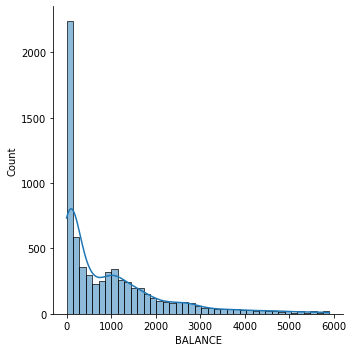

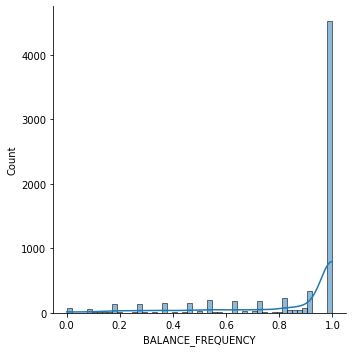

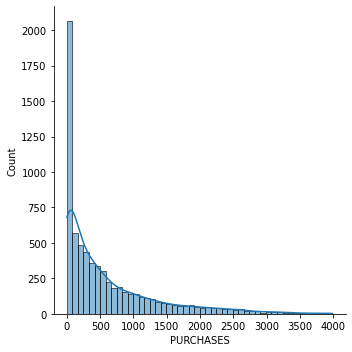

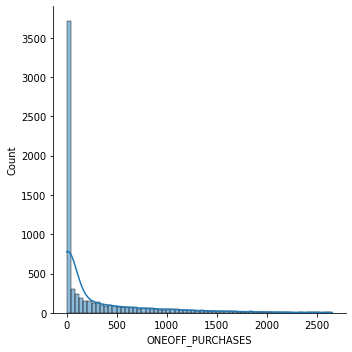

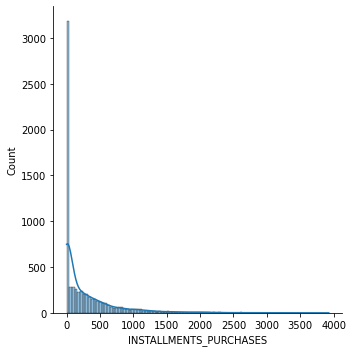

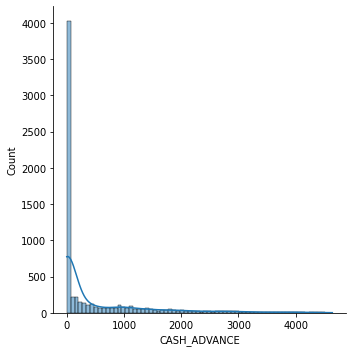

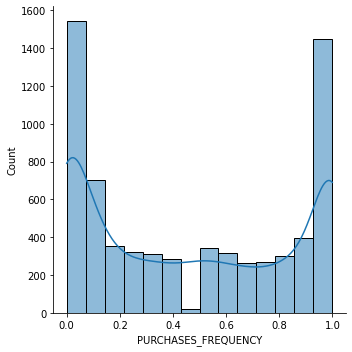

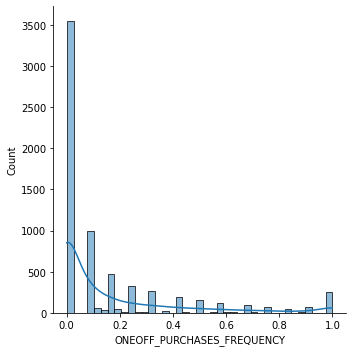

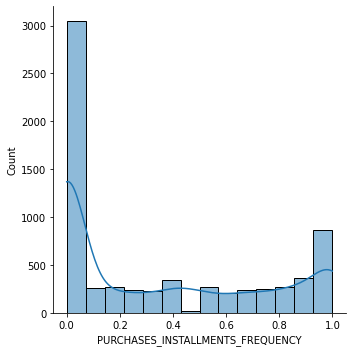

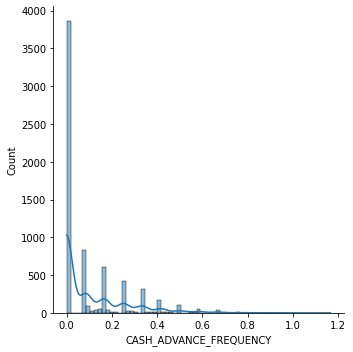

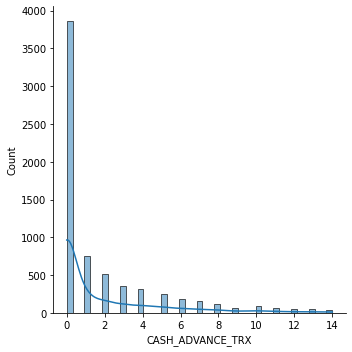

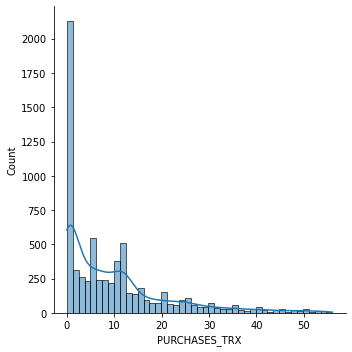

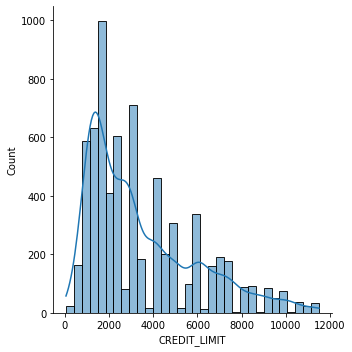

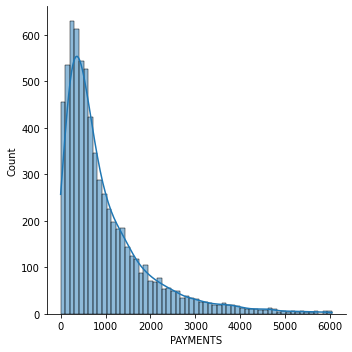

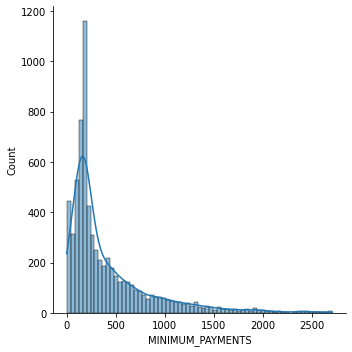

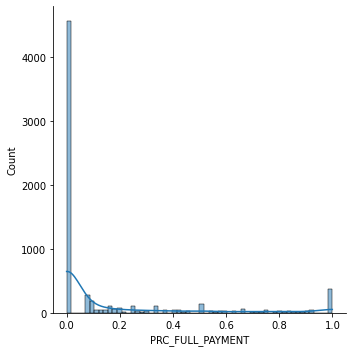

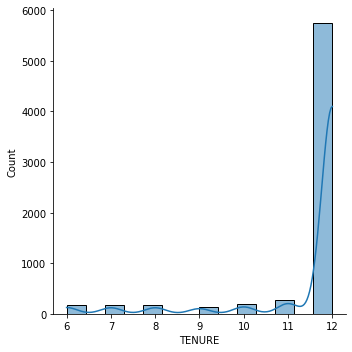

In [ ]:
for i in df.columns:
  sns.displot(df[i],kde=True)

In [ ]:
#Library Import from sklearn.preprocessing import __________ 
['BALANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']
from sklearn import metrics
from sklearn.metrics import silhouette_score
#v_measure_score
from sklearn.cluster import KMeans 
# Normalize # Você deve montar o procedimento aqui _______________ _______________ _______________ 
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df[['BALANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']])

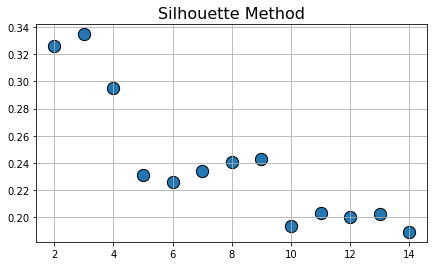

In [ ]:
alvo = normalized_df#df
max = 15
km_scores = []
km_silhouette = []
for i in range(2,max):
  km = KMeans(n_clusters=i, random_state=0).fit(alvo)
  preds = km.predict(alvo)
  km_scores.append(-km.score(alvo))
  silhouette = silhouette_score(alvo,preds)
  km_silhouette.append(silhouette)
  # Plotagem do método da Silhouette (Silhueta)
plt.figure(figsize=(7,4))
plt.title("Silhouette Method",fontsize=16)
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True) 
plt.show()

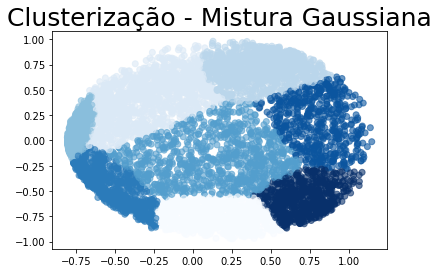

In [ ]:
#Nota: Execute a seguinte ordem do processo: Standard -> Normalize -> PCA para 2 Dimensões -> Aplicar o GaussianMixture no resultante 2D.
#Library Import 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
# Standardize data 
scaler = StandardScaler()
#scaled_df = scaler.fit_transform(df)
scaled_df =scaler.fit_transform(df[['BALANCE','PURCHASES','MINIMUM_PAYMENTS','PAYMENTS','CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES','CASH_ADVANCE','CASH_ADVANCE_TRX']])
# Normalizing 
normalized_df = normalize(scaled_df,axis=1)
# PCA _____________ 
pca = PCA(n_components=2)
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
# Plotagem da clusterização (em 2D) 
plt.title('Clusterização - Mistura Gaussiana',fontsize=25) 
plt.scatter(X_principal['P1'], 
            X_principal['P2'],
            c = GaussianMixture(n_components = 8).fit_predict(X_principal),
            alpha = 0.6,cmap='Blues')
plt.show()